In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
items = pd.read_csv('items.csv')
item_category = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')
sales_train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')

In [3]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
num_shop = sales_train['shop_id'].nunique()

In [5]:
num_item = sales_train['item_id'].nunique()

In [6]:
num_block = sales_train['date_block_num'].nunique()

In [7]:
max_item_id = sales_train['item_id'].max()

In [8]:
max_shop_id = sales_train['shop_id'].max()

In [9]:
train_data = sales_train.join(items.set_index('item_id'), on = 'item_id')

In [10]:
train_data = train_data.join(shops.set_index('shop_id'), on = 'shop_id')

In [11]:
sales_to_date = train_data.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()

In [12]:
sales_to_date.head()

,shop_id,date_block_num,item_cnt_day
0,0,0,5578.0
1,0,1,6127.0
2,1,0,2947.0
3,1,1,3364.0
4,2,0,1146.0


In [16]:
train_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум"""


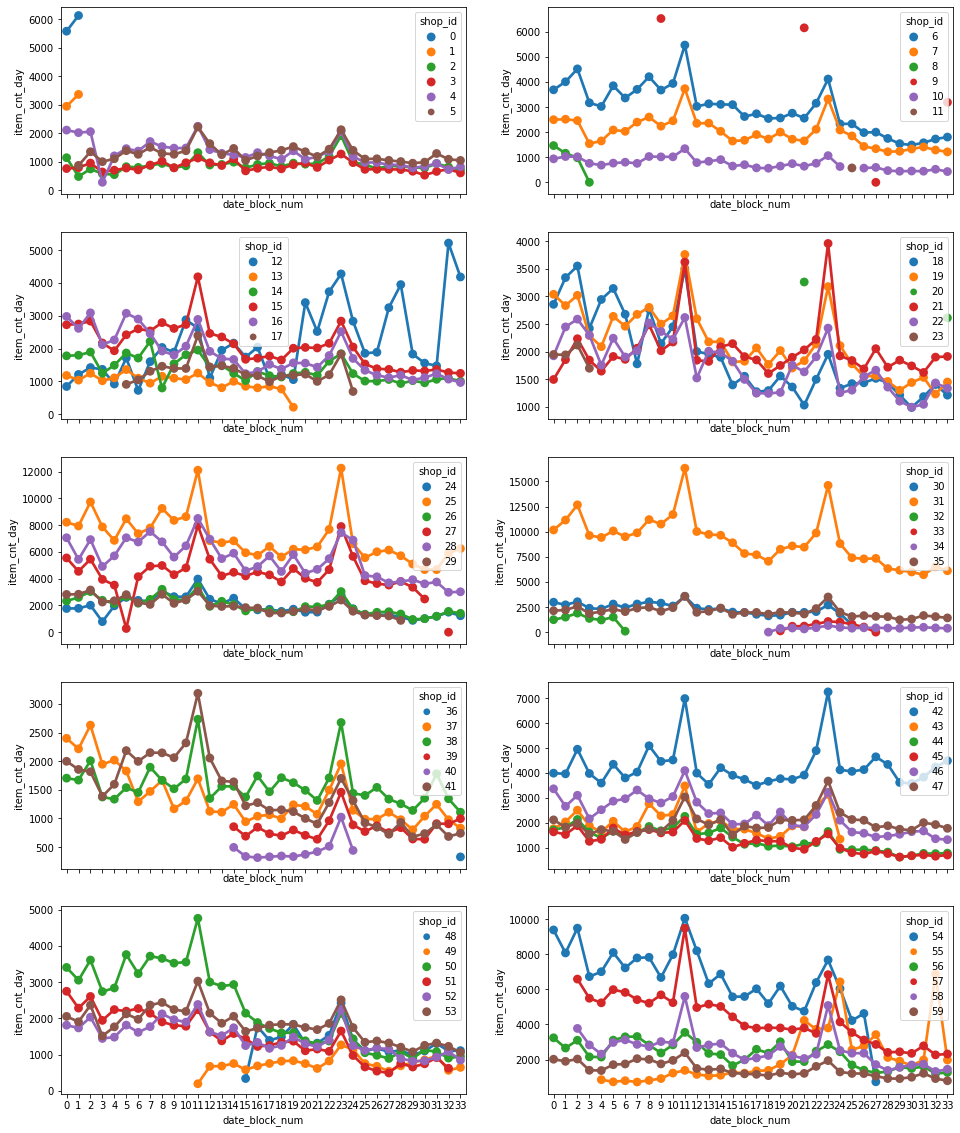

In [13]:
from math import ceil
fig, axes = plt.subplots(nrows = 5, ncols = 2, sharex = True, sharey = False, figsize = (16, 20))
num_graph = 10
shop_per_graph = ceil(sales_to_date['shop_id'].max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x = 'date_block_num', y = 'item_cnt_day', hue = 'shop_id', data = sales_to_date[np.logical_and(count*shop_per_graph <= sales_to_date['shop_id'], sales_to_date['shop_id'] < (count+1)*shop_per_graph)], ax = axes[i][j])
        count += 1

In [14]:
sales_to_categ = train_data.groupby(['item_category_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()

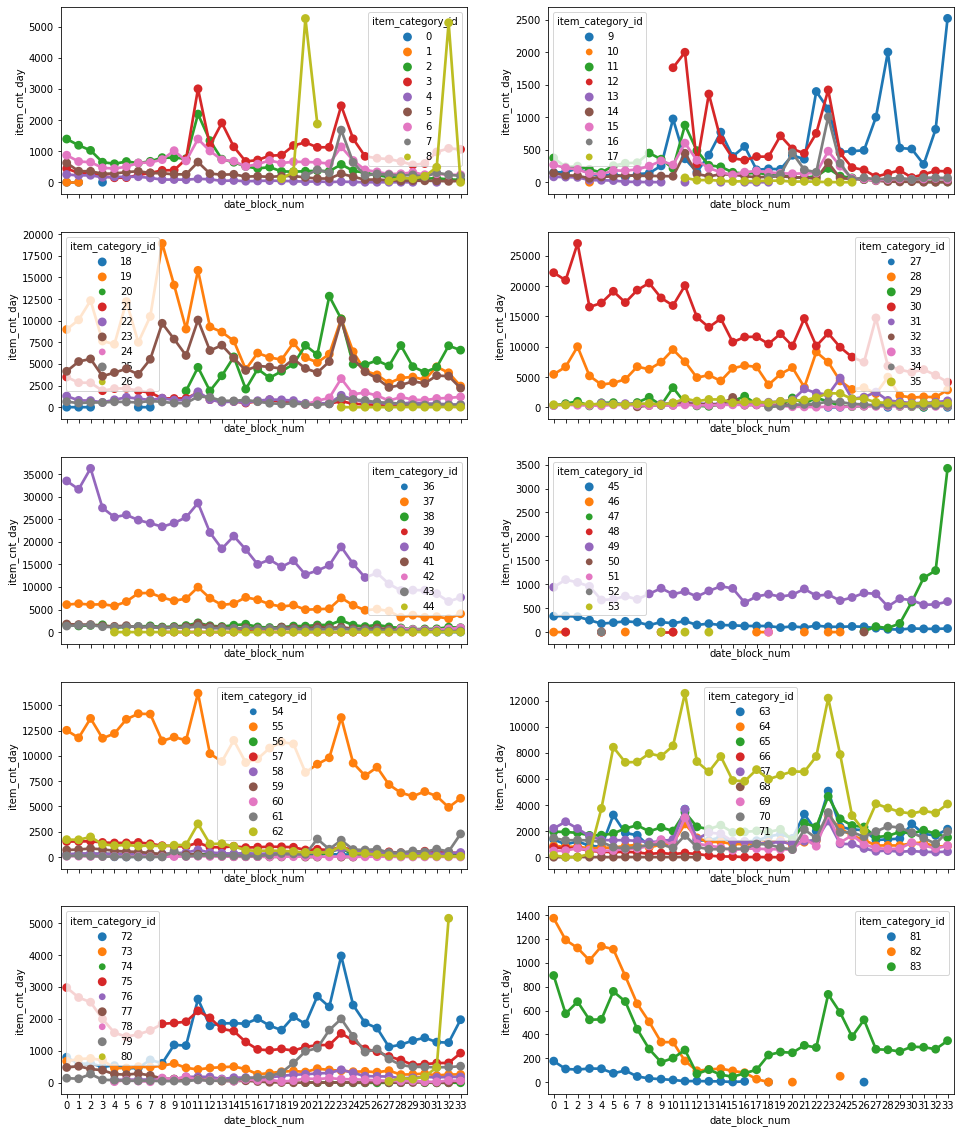

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=False, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(sales_to_categ.item_category_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='item_category_id', 
                      data=sales_to_categ[np.logical_and(count*id_per_graph <= sales_to_categ['item_category_id'], sales_to_categ['item_category_id'] < (count+1)*id_per_graph)], 
                      ax=axes[i][j])
        count += 1

In [ ]:
price_level = pd.cut(train_data['item_price'], bins = [0, 500, 1000, 2000, 3000, 4000, 5000, 10000, 400000], 
                     labels = ['<500', '1000', '2000', '3000', '4000', '5000', '10000', '>10000'])

In [ ]:
train_data.insert(5, 'price_level', price_level)

In [ ]:
sales_to_price = train_data.groupby(['price_level'])['item_cnt_day'].sum().reset_index()

In [ ]:
fig = plt.figure()
sns.pointplot(x = 'price_level', y = 'item_cnt_day', data = sales_to_price)

In [ ]:
train_data = train_data.drop(['item_name', 'shop_name'], axis = 1)

In [ ]:
train_data = train_data.drop(['price_level'], axis = 1)

In [ ]:
from datetime import datetime, date
from dateutil.relativedelta import relativedelta

train_data['month'] = train_data.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%m'))
train_data['year'] = train_data.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%Y'))

In [ ]:
num_categ = train_data['item_category_id'].nunique()

In [ ]:
max_categ = train_data['item_category_id'].max()

In [ ]:
train_data = train_data.drop(['date'], axis = 1)

In [ ]:
aveg_price = train_data.groupby(['date_block_num', 'shop_id', 'item_id'])['item_price'].mean().reset_index()

In [ ]:
aveg_cnt = train_data.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()

In [ ]:
num_to_month = train_data[['date_block_num', 'month', 'year']]

In [ ]:
num_to_month = num_to_month.drop_duplicates()

In [ ]:
#train_data = sales_train.join(items.set_index('item_id'), on = 'item_id')
train = aveg_price.join(aveg_cnt.set_index(['date_block_num', 'shop_id', 'item_id']), on = ['date_block_num', 'shop_id', 'item_id'])

In [ ]:
train = train.join(num_to_month.set_index('date_block_num'), on = 'date_block_num')

In [ ]:
train = train.set_index(['shop_id', 'item_id', 'date_block_num'])

In [ ]:
def convert(date_block):
    date = datetime(2013, 1, 1)
    date += relativedelta(months = date_block)
    return (date.month, date.year)

def closest_date_block(current_day, shop_id, item_id):
    if (shop_id, item_id) in train.index:
        search_list = np.array(train.loc[(shop_id, item_id)].index)
        return search_list[np.abs(current_day - search_list).argmin()]
    return -1

def closest_price(current_day, shop_id, item_id):
    closest_date = closest_date_block(current_day, shop_id, item_id)
    if closest_date != -1:
        return train.loc[(shop_id, item_id, closest_date)]['item_price']
    return np.nan

In [ ]:
from sklearn.preprocessing import MinMaxScaler

price_scaler = MinMaxScaler()
train['month'] = price_scaler.fit_transform(train['item_price'])

cnt_scaler = MinMaxScaler()
train['item_cnt_day'] = cnt_scaler.fit_transform(train['item_cnt_day'])

In [ ]:
train_shops = train.reset_index()['shop_id'].unique()

In [ ]:
maxlen = 4
sentences = [[],[],[]]
next_chars = [[], []]
BLOCKS = [6, 18, 30]

for shop in train_shops:
    shop_items = list(train.loc[shop].index.get_level_values(0).unique())
    for item in shop_items:
        for i_index, i in enumerate(BLOCKS):
            sentence = []
            closest_pc = closest_price(shop, item, i)   
            for j in range(maxlen + 1):
                if j < maxlen:
                    month, year = convert(i + j)
                    if (shop, item, i + j) in train.index:
                        r = train.loc[(shop, item, i + j)].to_dict()
                        closest_pc = r['item_price']
                        item_cnt_day = r['item_cnt_day']
                        row = {'shop_id': shop, 'item_id': item, 'item_price': closest_pc, 
                                'item_cnt_day': item_cnt_day, 'month': month}
                    else:
                        row = {'shop_id': shop, 'item_id': item, 'item_price': closest_pc, 
                                'item_cnt_day': 0, 'month': month}
                    sentence.append(row)
                elif i_index < 2:
                    month, year = convert(i + j)
                    if (shop, item, i + j) in train.index:
                        r = train.loc[(shop, item, i + j)].to_dict()
                        closest_pc = r['item_price']
                        item_cnt_day = r['item_cnt_day']
                        row = {'shop_id': shop, 'item_id': item, 'item_price': closest_pc, 
                                'item_cnt_day': item_cnt_day, 'month': month}
                    else:
                        row = {'shop_id': shop, 'item_id': item, 'item_price': closest_pc, 
                                'item_cnt_day': 0, 'month': month}
                    next_chars[i_index].append(row)
            sentences[i_index].append(sentence)

In [ ]:
X_train_orig = np.array(sentences[0])
X_val_orig = np.array(sentences[1])
X_test_orig = np.array(sentences[2])
y_train = np.array([x['item_cnt_day'] for x in next_chars[0]])
y_val = np.array([x['item_cnt_day'] for x in next_chars[1]])

In [ ]:
length = num_shop + num_item + maxlen + 1 + 1 + 1

In [ ]:
shops = train_data['shop_id'].unique()
items = train_data['item_id'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder

shop_le = LabelEncoder()
shop_le.fit(shops)
shop_dm = dict(zip(shops, shop_le.transform(shops)))

item_le = LabelEncoder()
item_le.fit(items)
item_dm = dict(zip(items, item_le.transform(items)))

month_le = preprocessing.LabelEncoder()
month_le.fit(range(7,11))
month_dm = dict(zip(range(7,11), month_le.transform(range(7,11))))


In [ ]:
def vectorize(data):
    x = np.zeros((len(data), maxlen, length), dtype = np.float32)
    for i, sentence in enumerate(data):
        for j, row in enumerate(sentence):
            x[i][j][shop_dm[row['shop_id']]] = 1
            x[i][j][num_shop + item_dm[row['item_id']]] = 1
            x[i][j][num_shop + num_item + month_dm[row['month']]] = 1
            x[i][j][num_shop + num_item + maxlen + 1] = row['item_price']
            x[i][j][num_shop + num_item + maxlen + 1 + 1] = row['item_cnt_day']
    return x

In [ ]:
x_train = vectorize(X_train_orig)
x_val = vectorize(X_val_orig)
x_test = vectorize(X_test_orig)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape = (maxlen, length)))
model.add(Dense(1, activation = 'relu'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x = x_train,  y = y_train,  epochs = 13, batch_size = 128)

In [ ]:
model.fit(x = x_val, y = y_val, epochs = 13, batch_size = 128)

In [ ]:
predict_test = model.predict(x_test)
predict_test = cnt_scaler.inverse_transform(predict_test)